In [71]:
from database.adatabase import ADatabase
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
sapling = ADatabase("sapling")

In [73]:
sapling.connect()
trades = sapling.retrieve("positions")
sapling.disconnect()

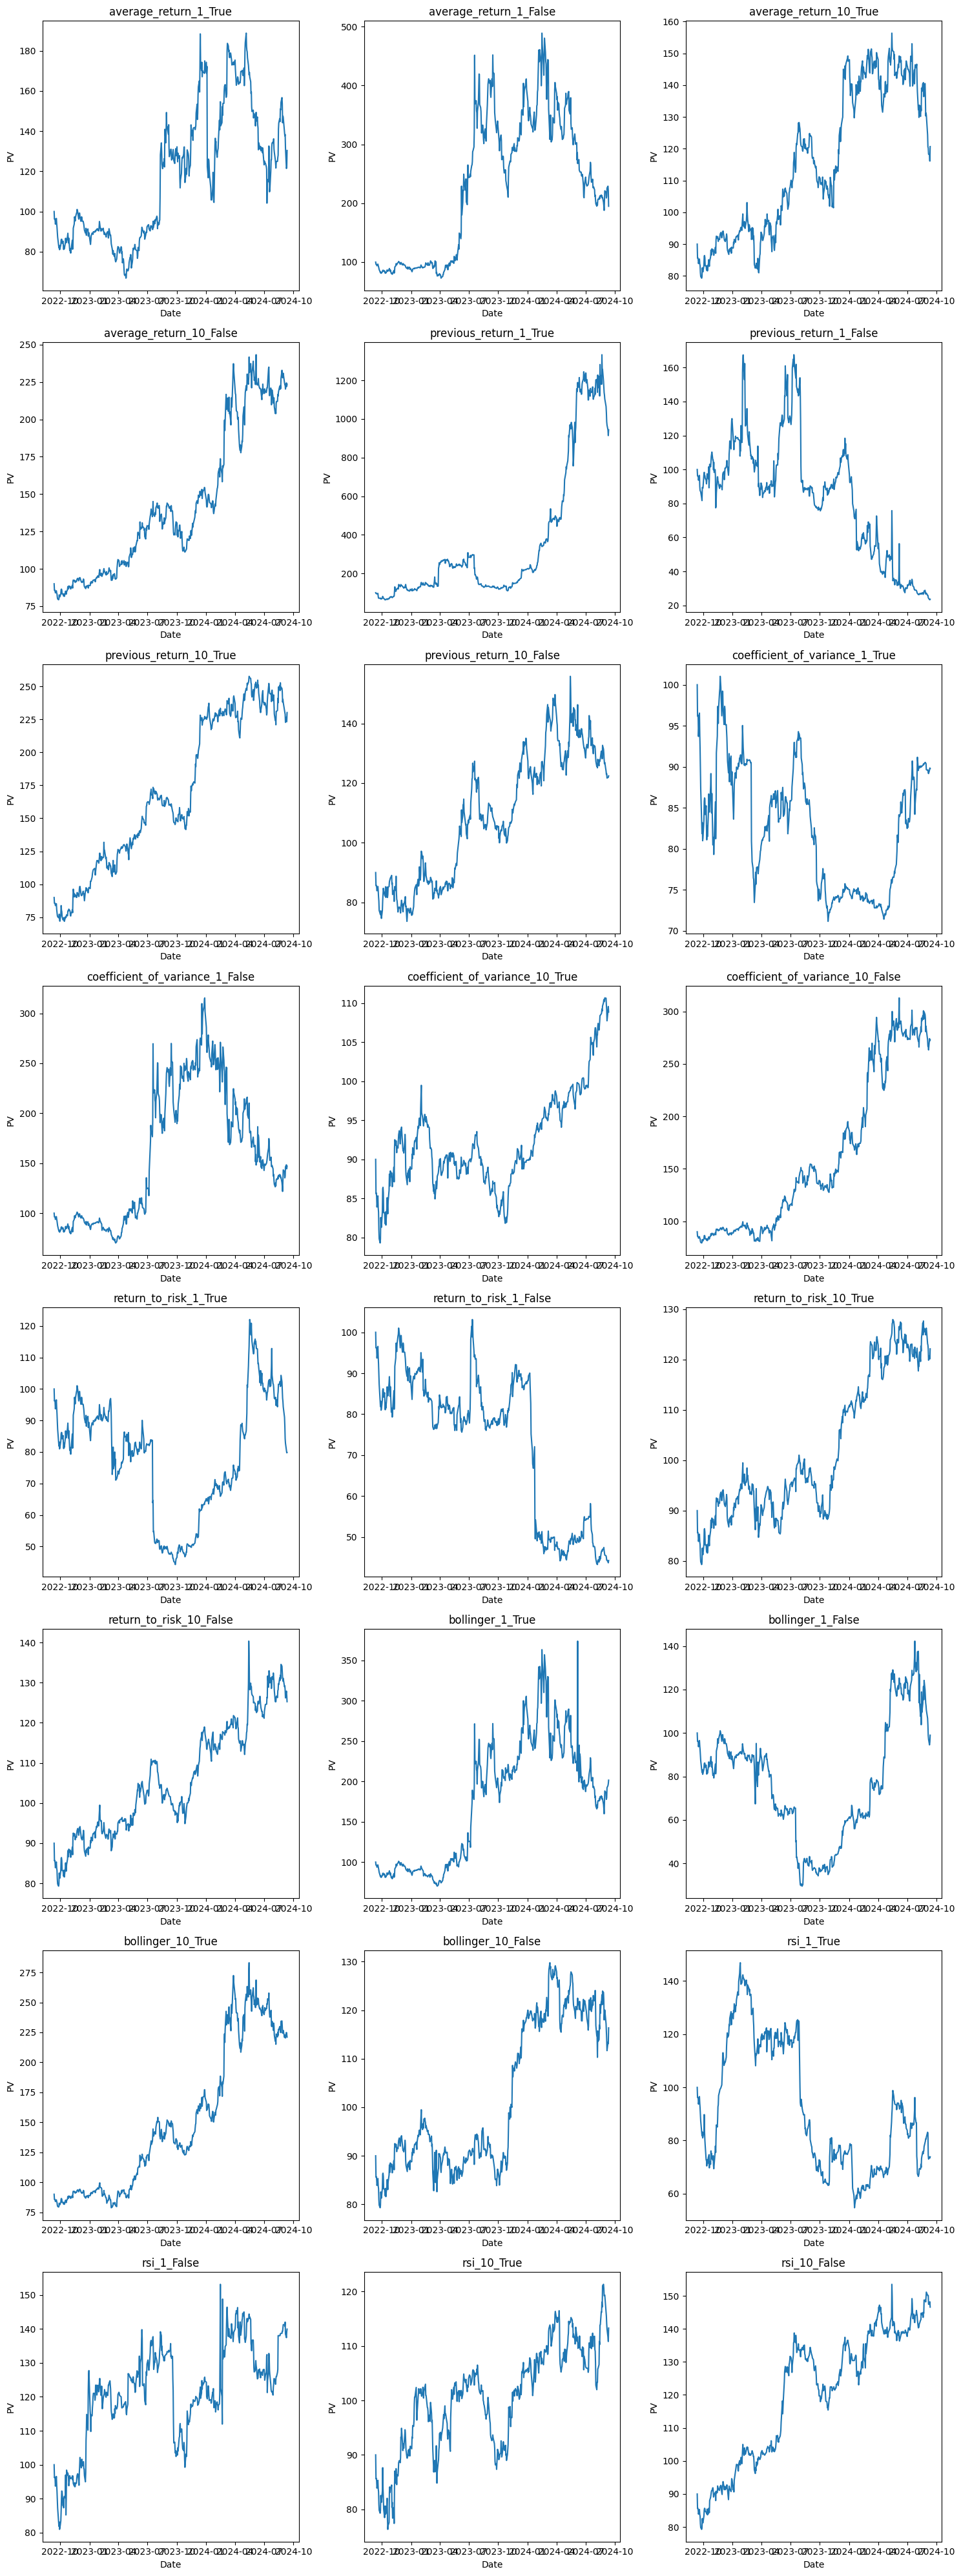

In [82]:
analysis = []

# Assuming trades DataFrame is already defined
trades["pv"] = trades["adjclose"] * trades["quantity"]

# Get unique values
names = trades["name"].unique()
positions = [1, 10]
booleans = [True, False]

# Calculate the number of plots
num_plots = len(names) * len(positions) * len(booleans)
num_columns = 3
num_rows = -(-num_plots // num_columns)  # Ceiling division

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

# Flatten the axes array for easier indexing
axes = axes.flatten()

plot_index = 0
for name in names:
    for position in positions:
        for boolean in booleans:
            portfolio = trades.pivot_table(index=["date", "name", "positions", "boolean"], 
                                           columns="position", values="pv").reset_index()
            portfolio = portfolio[(portfolio["name"] == name) & 
                                  (portfolio["positions"] == position) & 
                                  (portfolio["boolean"] == boolean)]
            if position == 1:
                portfolio["pv"] = portfolio[0]
            else:
                portfolio["pv"] = [sum([row[1][i] for i in range(trades["position"].max())]) 
                                   for row in portfolio.iterrows()]
            stuff = {}
            stuff["name"] = name
            stuff["position"] = position
            stuff["boolean"] = boolean
            stuff["pv"] = portfolio["pv"].iloc[-1].item()
            stuff["std"] = portfolio["pv"].std()
            analysis.append(stuff)
            # Plotting
            ax = axes[plot_index]
            ax.plot(portfolio["date"].values, portfolio["pv"].values)
            ax.set_title(f"{name}_{position}_{boolean}")
            ax.set_xlabel('Date')
            ax.set_ylabel('PV')
            
            plot_index += 1

# Hide any unused axes
for i in range(plot_index, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [87]:
a = pd.DataFrame(analysis)
a["risk_to_return"] = a["pv"] / a["std"]
a.sort_values("risk_to_return",ascending=False)

,name,position,boolean,pv,std,risk_to_return
10,coefficient_of_variance,10,True,108.865259,6.444608,16.892455
8,coefficient_of_variance,1,True,89.790931,7.436652,12.074106
22,rsi,10,True,113.290834,9.686645,11.695570
21,rsi,1,False,139.915762,14.663252,9.541933
15,return_to_risk,10,False,125.257675,14.080729,8.895681
14,return_to_risk,10,True,122.114975,14.048188,8.692578
19,bollinger,10,False,116.360492,15.311654,7.599472
23,rsi,10,False,146.577707,19.925314,7.356356
7,previous_return,10,False,122.436429,21.441540,5.710244
2,average_return,10,True,120.678293,22.931888,5.262467


In [85]:
trade_analysis = trades[(trades["name"]=="previous_return") & (trades["positions"]==10) & (trades["boolean"]==True)]
trade_analysis["return"] = (trade_analysis["adjclose"] - trade_analysis["buy_price"]) / trade_analysis["buy_price"]

C:\Users\eric\AppData\Local\Temp\ipykernel_12344\3419506570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_analysis["return"] = (trade_analysis["adjclose"] - trade_analysis["buy_price"]) / trade_analysis["buy_price"]


In [76]:
trade_analysis.sort_values("return",ascending=False)

,side,type,time_in_force,symbol,notional,adjclose,quantity,buy_date,buy_price,date,position,name,positions,boolean,pv,return
13452,buy,market,day,VKTX,12.17,17.33,1.334430,2023-03-27,9.12,2023-03-30,0,previous_return,10,True,23.125669,0.900219
13462,buy,market,day,VKTX,12.17,16.65,1.334430,2023-03-27,9.12,2023-03-31,0,previous_return,10,True,22.218257,0.825658
13442,buy,market,day,VKTX,12.17,15.93,1.334430,2023-03-27,9.12,2023-03-29,0,previous_return,10,True,21.257467,0.746711
13432,buy,market,day,VKTX,12.17,15.44,1.334430,2023-03-27,9.12,2023-03-28,0,previous_return,10,True,20.603596,0.692982
12512,buy,market,day,CVNA,8.80,11.88,1.190798,2022-11-07,7.39,2022-11-11,0,previous_return,10,True,14.146685,0.607578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13219,buy,market,day,CVNA,13.35,8.01,1.211434,2023-02-13,11.02,2023-02-24,7,previous_return,10,True,9.703584,-0.273140
13218,buy,market,day,W,13.35,37.43,0.253899,2023-02-13,52.58,2023-02-24,6,previous_return,10,True,9.503433,-0.288132
17066,buy,market,day,SMCI,27.60,386.46,0.049066,2024-08-26,562.51,2024-09-06,4,previous_return,10,True,18.961967,-0.312972
14222,buy,market,day,APLS,18.57,34.39,0.353984,2023-07-17,52.46,2023-07-21,0,previous_return,10,True,12.173509,-0.344453
